### Methodology Followed:

**OverView:**
- ACRONYMS : 
    - **UBLR** : Univariate binary logistic regression
    - **MBLR** : Multivariate binary logistic regression.
<br><br>
- METHODOLOGY :
    - **UBLR of metrics versus faults** : Determine which metrics are statistically significant.
    - **Collinearity analysis** : Determine which metrics to include in the model.
    - **Develop the model** : If time permits.



# 1. Data Preparation
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_V8  = pd.read_csv('data/v8.2.1.csv');
data_v10 = pd.read_csv('data/v10.0.csv');
data_v12 = pd.read_csv('data/v12.0.csv');
data_v14 = pd.read_csv('data/wildflyv14.0.1.csv');
data_v16 = pd.read_csv('data/wildfly.v16.0.csv');

dataSets = {
    'v8':data_V8,
    'v10':data_v10,
    'v12':data_v12,
    'v14':data_v14,
    'v16':data_v16,
}

Studied in class:
wmc
dit
noc
cbo
rfc
lcom

extra
nloc
sloc
cyclomatic


### Columns:
Renaming columns for readability and ease of use
- Kind : **kind**
- Name : **name**
- CountClassCoupled : **cbo**
- CountLineCode : **sloc**
- Cyclomatic : **cyclomatic (Cyclomatic Complexity)**
- MaxInheritanceTree : **dit**
- PercentLackOfCohesion : **lcom**
- SumCyclomatic : **wmc**

In [2]:
newColumns = ['kind','name','cbo','sloc','cyclomatic','dit','lcom','wmc'];

for dataset in dataSets:
    dataSets[dataset].columns = newColumns;
    dataSets[dataset] = dataSets[dataset].drop('kind',axis=1);
    dataSets[dataset] = dataSets[dataset].drop('name',axis=1);

---
# 2. Exploratory Data Analysis
---

### Exploring means for each attribute:

**Observations:**
- CBO : 
    - Dips from V8 to V12
    - slightly increases and remains steady for coming releases.
- WMC and Cyclomatic complexity : 
    - Drops steadily for each release
- SLOC : Here we can see an interesting pattern, 
    - Drops from V8 to V12, 
    - No changes are seen from V12 to V14
    - SLOC increase from V14 to V18
- DIT and LCOM : 
    - Here we can assume a corelation between these to metrics.
    - We can observe an inverse relationship between these metrics.

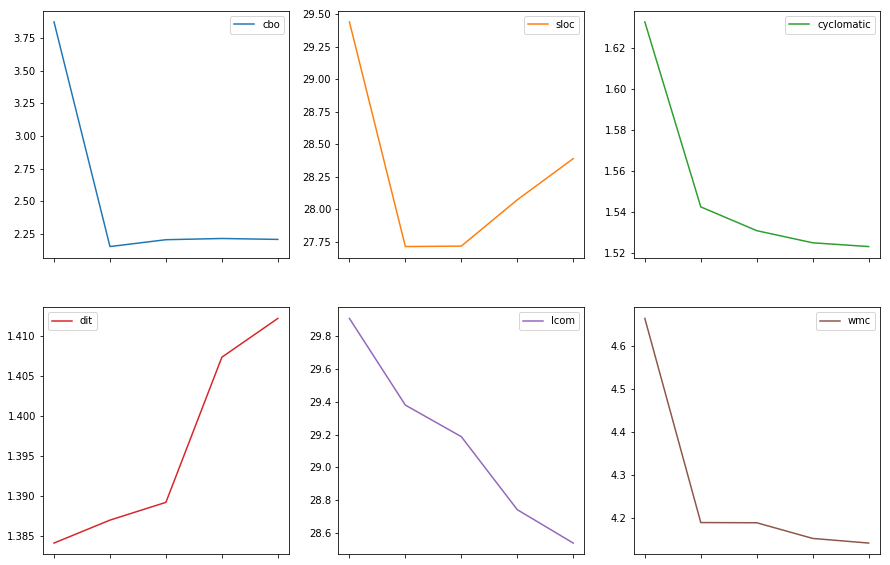

In [13]:
def exploreMean(dataSets):
    meanDataset = pd.DataFrame();
    
    for dataset in dataSets:
        meanDataset[dataset] = dataSets[dataset].mean();
    return meanDataset.transpose();

means = exploreMean(dataSets)

f,ax = plt.subplots(ncols=3,nrows=2,figsize=(15,10))
plot = means.plot(subplots=True,ax=ax);


**Helper Functions:**
- **getFaultBinary(dataFrame)** : 
    - uses bad smell criterias for binary classification
    - creates faultProne column (Binary)
- **getFaultyData( dataFrame, columname )**:
    - returns rows with faultProne=1

In [ ]:
def getFaultBinary(data):
    
    data['faultProne']=0;

    def binaryFaultProne(row):

        #Long Method
        if row.cyclomatic > 5:
            row['faultProne'] = 1;
        #Large Class
        if row.dit > 5 :
            row['faultProne'] = 1;
        #Feature Envy    
        if row.cbo > 5 :
            row['faultProne'] = 1;
        #Data Class
        if row.lcom > 2 :
            row['faultProne'] = 1;
        #Large Class
        if row.wmc > 10 :
            row['faultProne'] = 1;

        return row
    
    return data_v10.apply(lambda x:binaryFaultProne(x),axis=1);

In [ ]:
def getFaultyData( data = pd.DataFrame, col=''):
    
    if (col==''):
        return data[data.faultProne==1];
    else:
        return data[data.faultProne==1][data[col].isnull()==False]
    